In [1]:
from meltingpot import substrate

2025-01-20 13:53:39.442295: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737377619.481767   41845 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737377619.495709   41845 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Specify your substrate config or get a default one by name

In [3]:
env_config = substrate.get_config("commons_harvest__open")
print(env_config)

action_set: !!python/tuple
- fireZap: 0
  move: 0
  turn: 0
- fireZap: 0
  move: 1
  turn: 0
- fireZap: 0
  move: 3
  turn: 0
- fireZap: 0
  move: 4
  turn: 0
- fireZap: 0
  move: 2
  turn: 0
- fireZap: 0
  move: 0
  turn: -1
- fireZap: 0
  move: 0
  turn: 1
- fireZap: 1
  move: 0
  turn: 0
action_spec: !!python/object/apply:dm_env.specs.DiscreteArray
- 8
- &id001 !!python/object/apply:numpy.dtype
  args:
  - i8
  - false
  - true
  state: !!python/tuple
  - 3
  - <
  - null
  - null
  - null
  - -1
  - -1
  - 0
- action
default_player_roles: !!python/tuple
- default
- default
- default
- default
- default
- default
- default
global_observation_names:
- WORLD.RGB
individual_observation_names:
- RGB
- READY_TO_SHOOT
lab2d_settings_builder: !!python/name:meltingpot.configs.substrates.lab2d_settings_builder ''
timestep_spec: !!python/object/new:dm_env._environment.TimeStep
- !!python/object/apply:dm_env.specs.BoundedArray
  - !!python/tuple []
  - *id001
  - !!python/object/apply:numpy._c

Also specify roles for the agents

In [5]:
roles = env_config.default_player_roles
print(roles)

('default', 'default', 'default', 'default', 'default', 'default', 'default')


Now we can build the env (substrate) from the config and roles

In [7]:
env = substrate.build_from_config(env_config, roles=roles)

In [8]:
env

In [9]:
num_players = len(roles)

Actions needs a list of actions, one for each player

In [12]:
actions = [1] * num_players

In [13]:
ts = env.step(actions)

This returns a `Timestep` object with reward and observation information

In [17]:
ts.reward

[array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.)]

In [15]:
len(ts.observation)

7

Each observation is a dict with multiple items

In [19]:
ts.observation[0].keys()

dict_keys(['COLLECTIVE_REWARD', 'READY_TO_SHOOT', 'RGB', 'WORLD.RGB'])

RGB is the pixel observation from the agent's perspective.

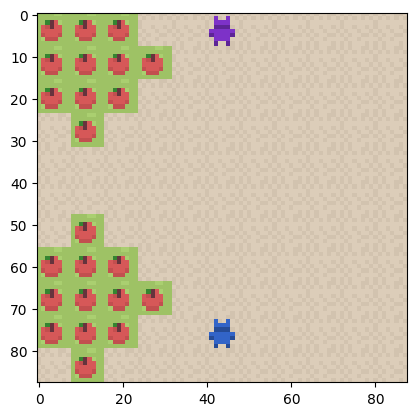

In [20]:
import matplotlib.pyplot as plt

plt.imshow(ts.observation[0]["RGB"])

WORLD.RGB plots the whole world.

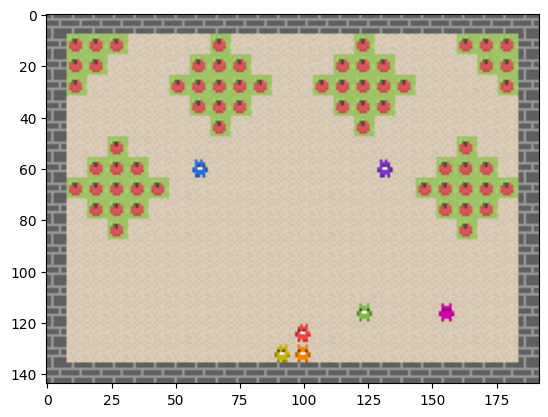

In [21]:
plt.imshow(ts.observation[0]["WORLD.RGB"])